In [ ]:
"""
batmf
File Name: visual_cell_verification.ipynb

Description:

Author: junghwan lee
Email: jhrrlee@gmail.com
Date Created: 2023.10.08

"""

In [1]:
import sys
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
sys.path.append('/content/drive/MyDrive')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/rul_toyota/data_analysis')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import pickle
import cleansing_lib as cl
from pathlib import Path

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.colors as colors
import matplotlib
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from scipy import interpolate
import cleansing_lib as cl
from pathlib import Path

In [3]:
data_path = Path('/content/drive/MyDrive/Colab_Notebooks/toyota_data/data/')
gen_path = Path('/content/drive/MyDrive/Colab_Notebooks/toyota_data/RUL_ML_Framework/resource/dataset/')
#data_path = './data/'


In [ ]:
from pathlib import Path
data_path = Path('..') / 'battery_data' / 'mit'
gen_path = Path('..') / 'resource' / 'dataset'

In [ ]:
battery_data_path = data_path / 'bat_dict.pkl'
eol_path = gen_path / 'eol.npy'
new_cycle_sum_path = gen_path / 'new_cycle_sum.npy'

In [4]:
eol = np.load(gen_path / 'eol.npy')
cycle_data = np.load(gen_path / 'interpolated_cycle_data.npy')
new_cycle_sum = np.load(gen_path / 'new_cycle_sum.npy')

In [5]:
cycle_count = np.arange(1, cycle_data.shape[1]+1)

num_cells = eol.shape[0]
num_cycles = cycle_count.shape[0]

# Repeat the EOL values for each cycle in the cycle_count array
eol_repeated = np.tile(eol, (1, num_cycles))

# Repeat the cycle_count values for each cell in the cycle_count array
cycle_count_repeated = np.tile(cycle_count, (num_cells, 1))

RUL_repeated = eol_repeated - cycle_count_repeated

print("RUL_repeated shape:", RUL_repeated.shape)
print("eol shape:", eol_repeated.shape)
print("cycle_count shape:", cycle_count_repeated.shape)
print("cycle_data shape:", cycle_data.shape)
print("new_cycle_sum shape:", new_cycle_sum.shape)

RUL_repeated shape: (124, 100)
eol shape: (124, 100)
cycle_count shape: (124, 100)
cycle_data shape: (124, 100, 8, 1000)
new_cycle_sum shape: (124, 14, 100)


In [9]:
with open(data_path / 'bat_dict.pkl', 'rb') as f:
    bat_dict = pickle.load(f)

In [10]:
key_list = list(bat_dict.keys())
df = pd.DataFrame({
  'Index': range(len(key_list)),
  'Key': key_list
})

In [11]:
df

,Index,Key
0,0,b1c0
1,1,b1c1
2,2,b1c2
3,3,b1c3
4,4,b1c4
...,...,...
119,119,b3c39
120,120,b3c40
121,121,b3c41
122,122,b3c44


## verify abnormal cells with visualization
abnormal cell idx "41,  44,  47,  60,  61,  86,  88, 107, 108, 110, 115, 116, 117" with anomalies_seq2seq_ae_v2


In [12]:
anomalies = [41, 44, 47, 60, 61, 86, 88, 107, 108, 110, 115, 116, 117]

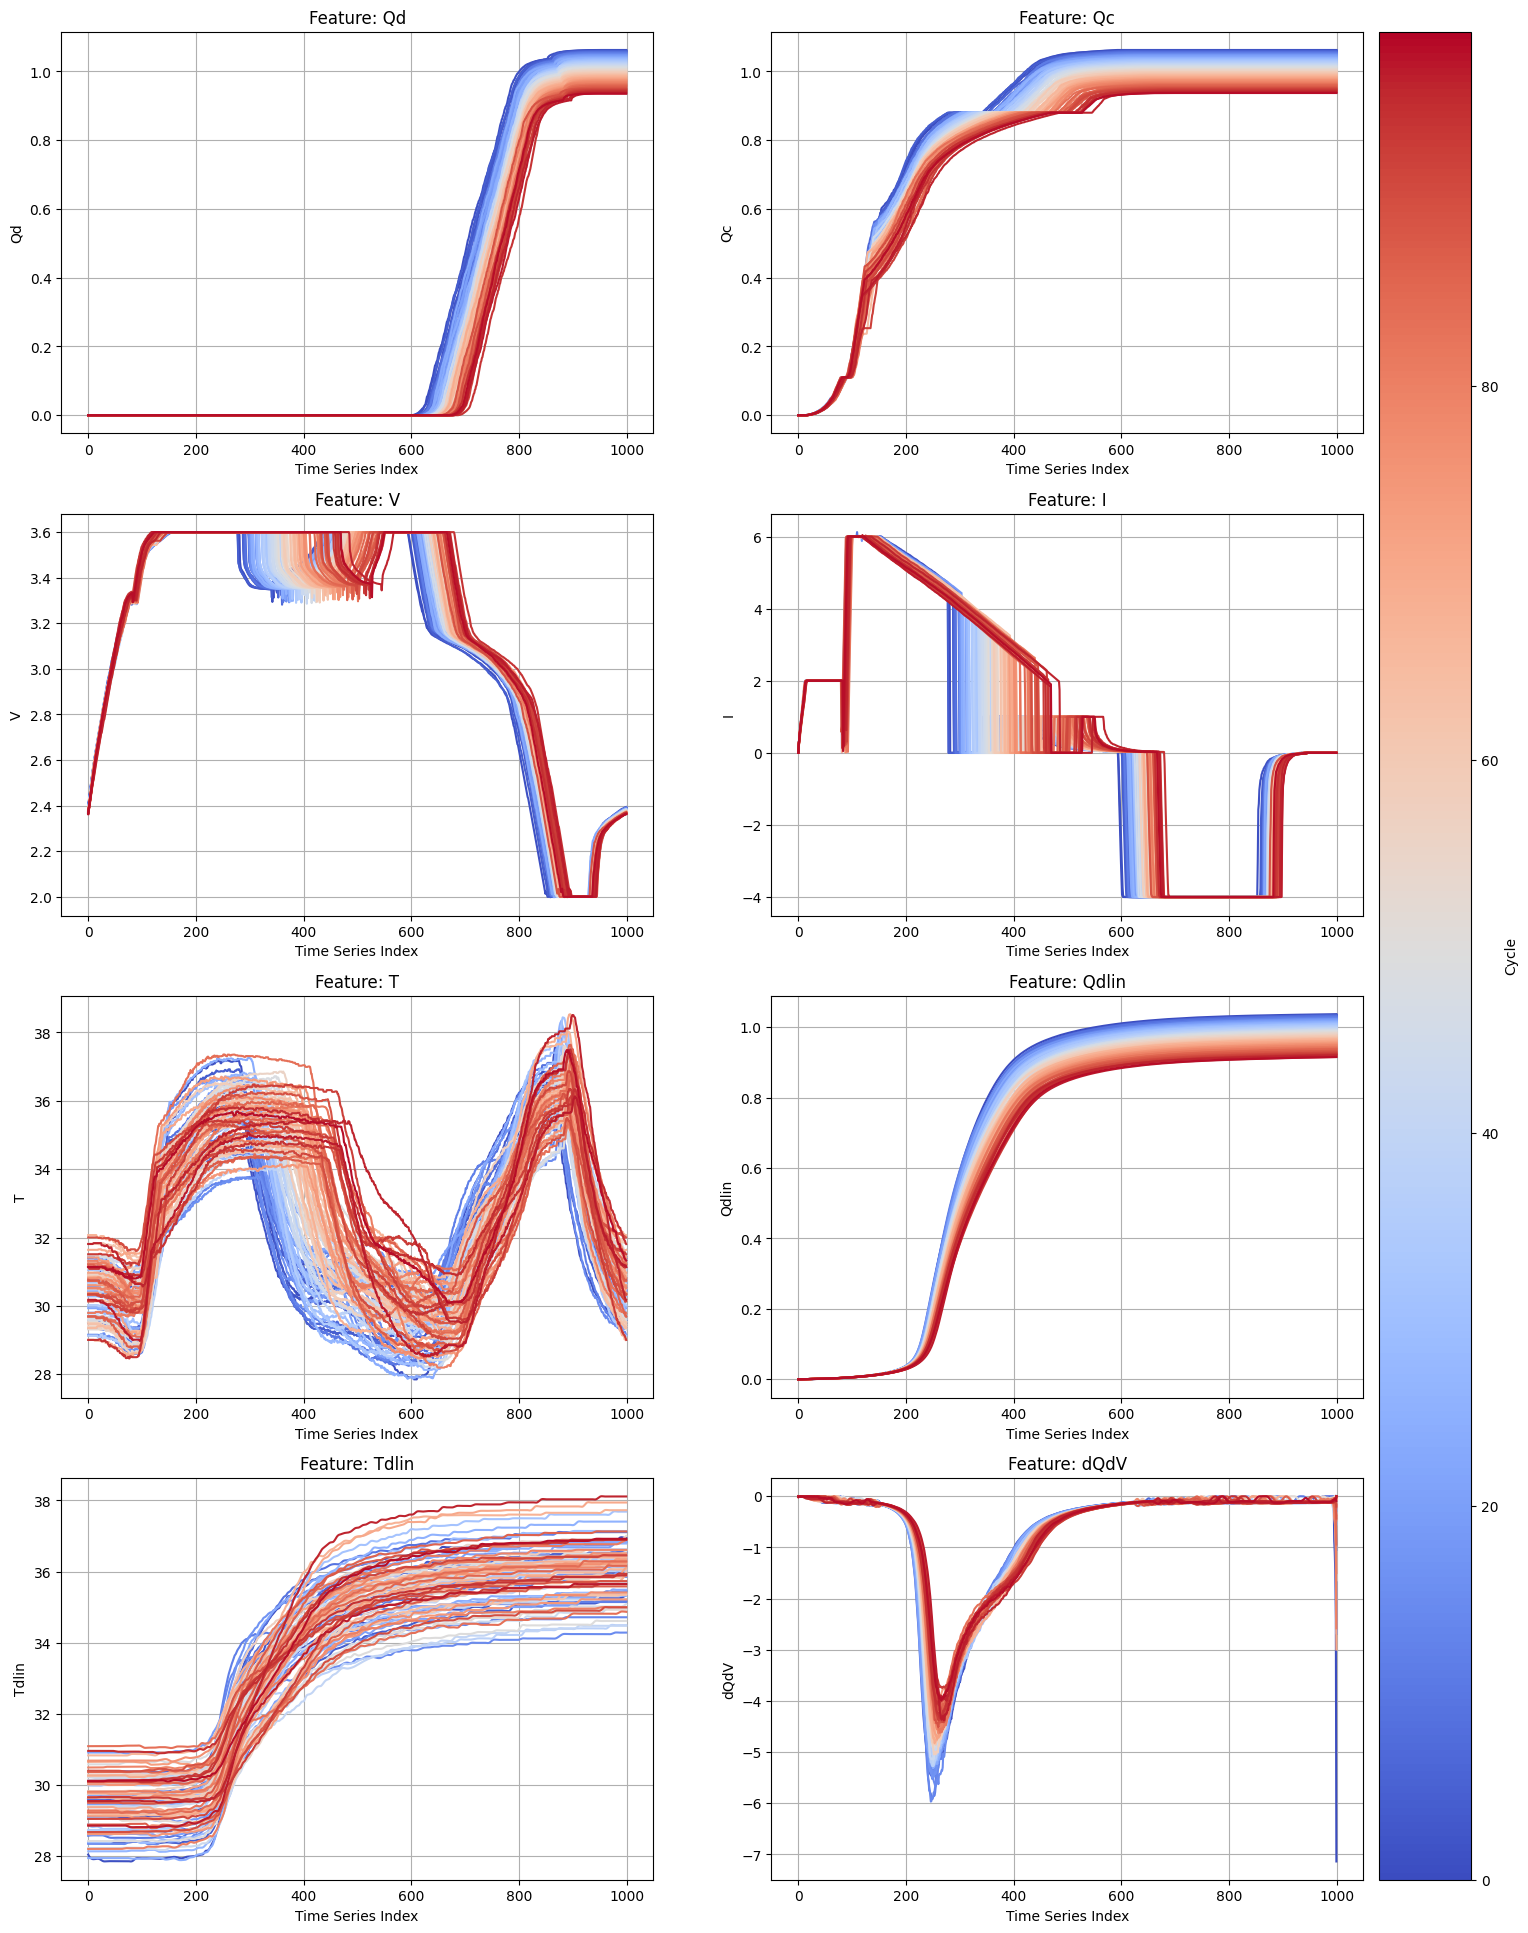

In [20]:
cl.plot_inp_cycles(cycle_data, cell_idx=42)

In [ ]:
for idx in anomalies:
  print(f'abnormal cell idx: {idx}, key: {df.iloc[idx]["Key"]}')
  cl.plot_inp_cycles(cycle_data, cell_idx=idx)

Output hidden; open in https://colab.research.google.com to view.

## delete abnormal cells

In [14]:
eol.shape

(124, 1)

In [18]:
df_eol = pd.DataFrame({
  'Index': range(len(eol.flatten())),
  'eol': eol.flatten()
})

In [21]:
df_eol.sort_values(by='eol', ascending=True)

,Index,eol
42,42,148.0
41,41,300.0
44,44,335.0
82,82,429.0
77,77,429.0
...,...,...
90,90,1836.0
0,0,1852.0
118,118,1935.0
1,1,2160.0


In [16]:
filtered_cycle_sum = np.delete(new_cycle_sum, anomalies, axis=0)
filtered_eol =  np.delete(eol, anomalies, axis=0)
print(filtered_cycle_sum.shape, filtered_eol.shape)

(111, 14, 100) (111, 1)


In [17]:
np.save(gen_path / 'filtered_cycle_sum.npy', filtered_cycle_sum)
np.save(gen_path / 'filtered_eol.npy', filtered_eol)